In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

(1, 201)
(1, 101)
(101, 201)


<Figure size 432x288 with 0 Axes>

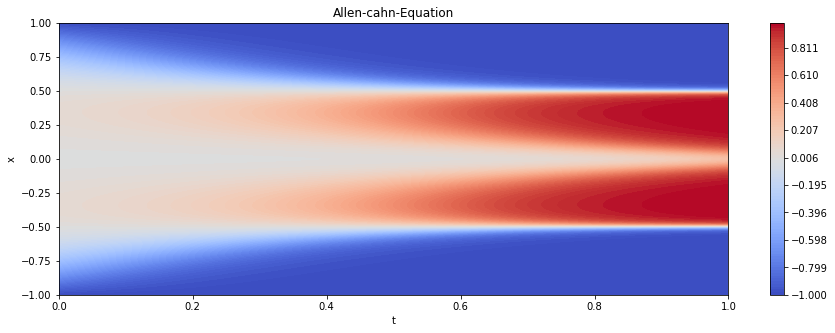

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat('Allen_Cahn.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Allen-cahn-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('X.mat')

X = mat_data['X']

mat_data1 = scipy.io.loadmat('y_pred.mat')

u1 = mat_data1['y_pred']

np.set_printoptions(threshold=np.inf)


In [5]:
u1 = u1.reshape(101, 201)
u1_new = u1.T

<Figure size 432x288 with 0 Axes>

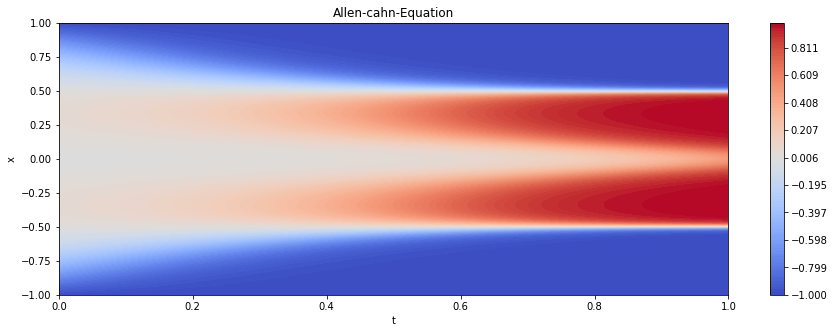

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split


X, T = np.meshgrid(x, t)

# # Define custom color levels
c_levels = np.linspace(np.min(u1_new),  np.max(u1_new), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1_new.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Allen-cahn-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [7]:
# Set random seed for reproducibility
torch.manual_seed(40)

In [8]:
# data = scipy.io.loadmat('y_pred.mat')
u1 = u1_new

In [9]:
# Toy problem data
input_size = 201  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 201
sequence_length = 80  # number of sequences/ number of rows
batch_size = 1
num_epochs = 20000

In [10]:
input_data = u1[:, 0:80]
target_data = u1[:, 1:81]

test_data = u1[:, 80] ### Change here
#test_target = u1[:, 81:101]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (201,)
input data shape (201, 80)
Target data shape (201, 80)


In [11]:
# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 80, 201])
Target tensor shape torch.Size([1, 80, 201])


In [12]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()


In [13]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)



# Training loop
for epoch in range(num_epochs):
    def closure():
        optimizer.zero_grad()
        hidden = torch.zeros(1, batch_size, hidden_size)

        # Forward pass
        output, hidden = rnn(input_tensor, hidden)
        loss = criterion(output, target_tensor)

        loss.backward()
        return loss

    optimizer.step(closure)

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1}/{num_epochs}, Loss: {closure().item():.16f}')

    

Epoch: 10/20000, Loss: 0.0517245791852474
Epoch: 20/20000, Loss: 0.0203288793563843
Epoch: 30/20000, Loss: 0.0079253995791078
Epoch: 40/20000, Loss: 0.0038117209915072
Epoch: 50/20000, Loss: 0.0024056276306510
Epoch: 60/20000, Loss: 0.0017239056760445
Epoch: 70/20000, Loss: 0.0013392085675150
Epoch: 80/20000, Loss: 0.0010649255709723
Epoch: 90/20000, Loss: 0.0009231757721864
Epoch: 100/20000, Loss: 0.0012289109872654
Epoch: 110/20000, Loss: 0.0006978128803894
Epoch: 120/20000, Loss: 0.0004500685899984
Epoch: 130/20000, Loss: 0.0003886869235430
Epoch: 140/20000, Loss: 0.0003341803967487
Epoch: 150/20000, Loss: 0.0002944543375634
Epoch: 160/20000, Loss: 0.0002712428104132
Epoch: 170/20000, Loss: 0.0002522529393900
Epoch: 180/20000, Loss: 0.0002386904670857
Epoch: 190/20000, Loss: 0.0002279277105117
Epoch: 200/20000, Loss: 0.0002187901991419
Epoch: 210/20000, Loss: 0.0002108923799824
Epoch: 220/20000, Loss: 0.0002061335253529
Epoch: 230/20000, Loss: 0.0019017840968445
Epoch: 240/20000, Lo

Epoch: 1910/20000, Loss: 0.0000108910007839
Epoch: 1920/20000, Loss: 0.0006845561438240
Epoch: 1930/20000, Loss: 0.0001591861218913
Epoch: 1940/20000, Loss: 0.0000766859157011
Epoch: 1950/20000, Loss: 0.0000249540607911
Epoch: 1960/20000, Loss: 0.0000129984227897
Epoch: 1970/20000, Loss: 0.0000095562973002
Epoch: 1980/20000, Loss: 0.0000076091337178
Epoch: 1990/20000, Loss: 0.0000064259820647
Epoch: 2000/20000, Loss: 0.0000058459181673
Epoch: 2010/20000, Loss: 0.0000058974715103
Epoch: 2020/20000, Loss: 0.0000272343804681
Epoch: 2030/20000, Loss: 0.0001222785213031
Epoch: 2040/20000, Loss: 0.0000489514386572
Epoch: 2050/20000, Loss: 0.0000205013438972
Epoch: 2060/20000, Loss: 0.0000089327022579
Epoch: 2070/20000, Loss: 0.0000078141292761
Epoch: 2080/20000, Loss: 0.0000471993444080
Epoch: 2090/20000, Loss: 0.0002623311302159
Epoch: 2100/20000, Loss: 0.0000554026846658
Epoch: 2110/20000, Loss: 0.0000209361096495
Epoch: 2120/20000, Loss: 0.0000110758783194
Epoch: 2130/20000, Loss: 0.00000

Epoch: 3790/20000, Loss: 0.0001778145815479
Epoch: 3800/20000, Loss: 0.0004452609864529
Epoch: 3810/20000, Loss: 0.0000860618238221
Epoch: 3820/20000, Loss: 0.0000307281188725
Epoch: 3830/20000, Loss: 0.0000145108451761
Epoch: 3840/20000, Loss: 0.0000064601399572
Epoch: 3850/20000, Loss: 0.0000039715623643
Epoch: 3860/20000, Loss: 0.0000046507925617
Epoch: 3870/20000, Loss: 0.0000182923595275
Epoch: 3880/20000, Loss: 0.0003021637385245
Epoch: 3890/20000, Loss: 0.0000485412783746
Epoch: 3900/20000, Loss: 0.0000392653237213
Epoch: 3910/20000, Loss: 0.0000112784346129
Epoch: 3920/20000, Loss: 0.0000062755962063
Epoch: 3930/20000, Loss: 0.0000027637604489
Epoch: 3940/20000, Loss: 0.0000029386660572
Epoch: 3950/20000, Loss: 0.0000024003904855
Epoch: 3960/20000, Loss: 0.0000023786869860
Epoch: 3970/20000, Loss: 0.0000026932286801
Epoch: 3980/20000, Loss: 0.0000137267552418
Epoch: 3990/20000, Loss: 0.0003460097941570
Epoch: 4000/20000, Loss: 0.0001483433443354
Epoch: 4010/20000, Loss: 0.00005

Epoch: 5660/20000, Loss: 0.0000043000613914
Epoch: 5670/20000, Loss: 0.0000162740761880
Epoch: 5680/20000, Loss: 0.0002782179508358
Epoch: 5690/20000, Loss: 0.0004183659621049
Epoch: 5700/20000, Loss: 0.0000926234279177
Epoch: 5710/20000, Loss: 0.0001674849772826
Epoch: 5720/20000, Loss: 0.0000337917626894
Epoch: 5730/20000, Loss: 0.0000221229711315
Epoch: 5740/20000, Loss: 0.0002303821238456
Epoch: 5750/20000, Loss: 0.0000551486955374
Epoch: 5760/20000, Loss: 0.0000296083835565
Epoch: 5770/20000, Loss: 0.0000102264511952
Epoch: 5780/20000, Loss: 0.0000031501795092
Epoch: 5790/20000, Loss: 0.0000033509741115
Epoch: 5800/20000, Loss: 0.0000013778118273
Epoch: 5810/20000, Loss: 0.0000014837992239
Epoch: 5820/20000, Loss: 0.0000051620063459
Epoch: 5830/20000, Loss: 0.0001591268519405
Epoch: 5840/20000, Loss: 0.0001267578190891
Epoch: 5850/20000, Loss: 0.0000554241341888
Epoch: 5860/20000, Loss: 0.0000127951589093
Epoch: 5870/20000, Loss: 0.0000060630363805
Epoch: 5880/20000, Loss: 0.00000

Epoch: 7540/20000, Loss: 0.0000017922469624
Epoch: 7550/20000, Loss: 0.0000987823732430
Epoch: 7560/20000, Loss: 0.0006302400724962
Epoch: 7570/20000, Loss: 0.0011730283731595
Epoch: 7580/20000, Loss: 0.0009418110130355
Epoch: 7590/20000, Loss: 0.0106197064742446
Epoch: 7600/20000, Loss: 0.0261865705251694
Epoch: 7610/20000, Loss: 0.0057151848450303
Epoch: 7620/20000, Loss: 0.0017884728731588
Epoch: 7630/20000, Loss: 0.0007715939427726
Epoch: 7640/20000, Loss: 0.0002943059080280
Epoch: 7650/20000, Loss: 0.0001104117473005
Epoch: 7660/20000, Loss: 0.0000560332082387
Epoch: 7670/20000, Loss: 0.0000339125981554
Epoch: 7680/20000, Loss: 0.0000222634735110
Epoch: 7690/20000, Loss: 0.0000163283420989
Epoch: 7700/20000, Loss: 0.0000133635385282
Epoch: 7710/20000, Loss: 0.0000114271415441
Epoch: 7720/20000, Loss: 0.0000100625065897
Epoch: 7730/20000, Loss: 0.0000089990908236
Epoch: 7740/20000, Loss: 0.0000081343050624
Epoch: 7750/20000, Loss: 0.0000074098438745
Epoch: 7760/20000, Loss: 0.00000

Epoch: 9410/20000, Loss: 0.0000007466666148
Epoch: 9420/20000, Loss: 0.0000007150937336
Epoch: 9430/20000, Loss: 0.0000006887012205
Epoch: 9440/20000, Loss: 0.0000006658531220
Epoch: 9450/20000, Loss: 0.0000006452227694
Epoch: 9460/20000, Loss: 0.0000006265727848
Epoch: 9470/20000, Loss: 0.0000006106575938
Epoch: 9480/20000, Loss: 0.0000007295687965
Epoch: 9490/20000, Loss: 0.0000069463549153
Epoch: 9500/20000, Loss: 0.0000022920905849
Epoch: 9510/20000, Loss: 0.0000015145627685
Epoch: 9520/20000, Loss: 0.0000034168544971
Epoch: 9530/20000, Loss: 0.0000392828515032
Epoch: 9540/20000, Loss: 0.0000600581115577
Epoch: 9550/20000, Loss: 0.0000880083171069
Epoch: 9560/20000, Loss: 0.0000614716554992
Epoch: 9570/20000, Loss: 0.0000217377291847
Epoch: 9580/20000, Loss: 0.0000055139939832
Epoch: 9590/20000, Loss: 0.0000029383566016
Epoch: 9600/20000, Loss: 0.0000101366222225
Epoch: 9610/20000, Loss: 0.0000675206902088
Epoch: 9620/20000, Loss: 0.0002551514189690
Epoch: 9630/20000, Loss: 0.00006

Epoch: 11250/20000, Loss: 0.0000006642117114
Epoch: 11260/20000, Loss: 0.0000007557899266
Epoch: 11270/20000, Loss: 0.0000034231275094
Epoch: 11280/20000, Loss: 0.0001494757889304
Epoch: 11290/20000, Loss: 0.0001406385854352
Epoch: 11300/20000, Loss: 0.0000193119612959
Epoch: 11310/20000, Loss: 0.0000142879443956
Epoch: 11320/20000, Loss: 0.0000075316297625
Epoch: 11330/20000, Loss: 0.0000045255278565
Epoch: 11340/20000, Loss: 0.0000023307375159
Epoch: 11350/20000, Loss: 0.0000015679411263
Epoch: 11360/20000, Loss: 0.0000008624261909
Epoch: 11370/20000, Loss: 0.0000007835639053
Epoch: 11380/20000, Loss: 0.0000008768683415
Epoch: 11390/20000, Loss: 0.0000040279396671
Epoch: 11400/20000, Loss: 0.0001317695569014
Epoch: 11410/20000, Loss: 0.0002288420946570
Epoch: 11420/20000, Loss: 0.0000681876699673
Epoch: 11430/20000, Loss: 0.0000326778754243
Epoch: 11440/20000, Loss: 0.0000077909917309
Epoch: 11450/20000, Loss: 0.0000029351351714
Epoch: 11460/20000, Loss: 0.0000021752910015
Epoch: 114

Epoch: 13100/20000, Loss: 0.0000010640274013
Epoch: 13110/20000, Loss: 0.0000010373278201
Epoch: 13120/20000, Loss: 0.0000010029248187
Epoch: 13130/20000, Loss: 0.0000010784768847
Epoch: 13140/20000, Loss: 0.0000041094863263
Epoch: 13150/20000, Loss: 0.0002011050964938
Epoch: 13160/20000, Loss: 0.0000515820211149
Epoch: 13170/20000, Loss: 0.0001604986900929
Epoch: 13180/20000, Loss: 0.0000091766842161
Epoch: 13190/20000, Loss: 0.0000221611826419
Epoch: 13200/20000, Loss: 0.0000032815351005
Epoch: 13210/20000, Loss: 0.0000031673200738
Epoch: 13220/20000, Loss: 0.0000020895354282
Epoch: 13230/20000, Loss: 0.0000013305912034
Epoch: 13240/20000, Loss: 0.0000010711897858
Epoch: 13250/20000, Loss: 0.0000010015317002
Epoch: 13260/20000, Loss: 0.0000009684878250
Epoch: 13270/20000, Loss: 0.0000010429397435
Epoch: 13280/20000, Loss: 0.0000052483173931
Epoch: 13290/20000, Loss: 0.0000022904762318
Epoch: 13300/20000, Loss: 0.0000009787186173
Epoch: 13310/20000, Loss: 0.0000020571712867
Epoch: 133

Epoch: 14940/20000, Loss: 0.0000158024213306
Epoch: 14950/20000, Loss: 0.0000054455995269
Epoch: 14960/20000, Loss: 0.0000043314071263
Epoch: 14970/20000, Loss: 0.0000025700537662
Epoch: 14980/20000, Loss: 0.0000015860541680
Epoch: 14990/20000, Loss: 0.0000017592443555
Epoch: 15000/20000, Loss: 0.0000105122608147
Epoch: 15010/20000, Loss: 0.0002948034962174
Epoch: 15020/20000, Loss: 0.0000080325035015
Epoch: 15030/20000, Loss: 0.0000442219461547
Epoch: 15040/20000, Loss: 0.0000110539913294
Epoch: 15050/20000, Loss: 0.0000073505789260
Epoch: 15060/20000, Loss: 0.0000028200622637
Epoch: 15070/20000, Loss: 0.0000017826988596
Epoch: 15080/20000, Loss: 0.0000010665221453
Epoch: 15090/20000, Loss: 0.0000014568149709
Epoch: 15100/20000, Loss: 0.0000035302557535
Epoch: 15110/20000, Loss: 0.0000256592320511
Epoch: 15120/20000, Loss: 0.0004798361915164
Epoch: 15130/20000, Loss: 0.0001147977745859
Epoch: 15140/20000, Loss: 0.0000248882370215
Epoch: 15150/20000, Loss: 0.0000171375031641
Epoch: 151

Epoch: 16780/20000, Loss: 0.0000200131489692
Epoch: 16790/20000, Loss: 0.0000082841497715
Epoch: 16800/20000, Loss: 0.0000037280815377
Epoch: 16810/20000, Loss: 0.0000022210581392
Epoch: 16820/20000, Loss: 0.0000013696052292
Epoch: 16830/20000, Loss: 0.0000015230812096
Epoch: 16840/20000, Loss: 0.0000032154557630
Epoch: 16850/20000, Loss: 0.0000012823431916
Epoch: 16860/20000, Loss: 0.0000050267526603
Epoch: 16870/20000, Loss: 0.0000076954120232
Epoch: 16880/20000, Loss: 0.0001825406652642
Epoch: 16890/20000, Loss: 0.0000921988394111
Epoch: 16900/20000, Loss: 0.0001537794159958
Epoch: 16910/20000, Loss: 0.0000275138700090
Epoch: 16920/20000, Loss: 0.0000198980815185
Epoch: 16930/20000, Loss: 0.0000080370800788
Epoch: 16940/20000, Loss: 0.0000015297537175
Epoch: 16950/20000, Loss: 0.0000018253889493
Epoch: 16960/20000, Loss: 0.0000013878465097
Epoch: 16970/20000, Loss: 0.0000010650099966
Epoch: 16980/20000, Loss: 0.0000010998940070
Epoch: 16990/20000, Loss: 0.0000083667882791
Epoch: 170

Epoch: 18630/20000, Loss: 0.0000010347628177
Epoch: 18640/20000, Loss: 0.0000009734493460
Epoch: 18650/20000, Loss: 0.0000009597266626
Epoch: 18660/20000, Loss: 0.0000009284631801
Epoch: 18670/20000, Loss: 0.0000009067433098
Epoch: 18680/20000, Loss: 0.0000009312389011
Epoch: 18690/20000, Loss: 0.0000009114778550
Epoch: 18700/20000, Loss: 0.0000009888609611
Epoch: 18710/20000, Loss: 0.0000009081329040
Epoch: 18720/20000, Loss: 0.0000039059482333
Epoch: 18730/20000, Loss: 0.0000030275634799
Epoch: 18740/20000, Loss: 0.0000008568932799
Epoch: 18750/20000, Loss: 0.0000011272476286
Epoch: 18760/20000, Loss: 0.0000008134662721
Epoch: 18770/20000, Loss: 0.0000008842547459
Epoch: 18780/20000, Loss: 0.0000008018011499
Epoch: 18790/20000, Loss: 0.0000007760128256
Epoch: 18800/20000, Loss: 0.0000008323623888
Epoch: 18810/20000, Loss: 0.0000007452120485
Epoch: 18820/20000, Loss: 0.0000007286125197
Epoch: 18830/20000, Loss: 0.0000007087043628
Epoch: 18840/20000, Loss: 0.0000011515126062
Epoch: 188

In [14]:
# # Create RNN instance
# rnn = RNN(input_size, hidden_size, output_size)

# # Loss and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# # Training loop
# for epoch in range(num_epochs):
#     # Set initial hidden state
#     hidden = torch.zeros(1, batch_size, hidden_size)

#     # Forward pass
#     output, hidden = rnn(input_tensor, hidden)
#     loss = criterion(output, target_tensor)

#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Print progress
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


In [15]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 201).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 201])
torch.Size([1, 20, 201])


In [16]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = rnn(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 201).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = rnn(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 201).float()
        prediction_tensor[:, i+1, :] = prediction

In [17]:
# exact
u_test = u
u_test_full = u_test[80:100, :]

In [18]:

k1 = (prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

torch.Size([20, 201])

In [19]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.005832545777443103 %


In [20]:
R_abs = torch.max(prediction-u_test_full)
R_abs

tensor(0.1457, dtype=torch.float64)

In [21]:
R_mean = torch.mean(torch.abs(prediction - u_test_full))
R_mean

tensor(0.0406, dtype=torch.float64)

In [22]:
import torch

a = prediction
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())


Explained Variance Score: 0.9951726801432064


In [23]:
prediction_tensor = torch.squeeze(prediction_tensor)
prediction_tensor.shape

torch.Size([20, 201])

In [24]:
conc_u = torch.squeeze(input_tensor)
prediction_tensor = torch.squeeze(prediction_tensor)

In [25]:
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

concatenated_tensor.shape

torch.Size([100, 201])

In [26]:
t1 = np.linspace(0, 1 , 100)

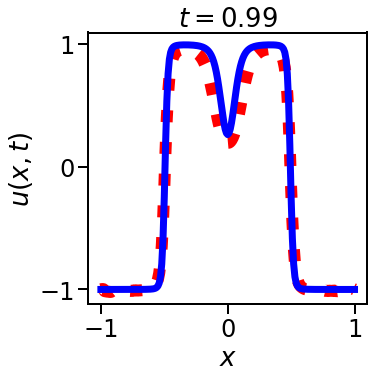

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.99}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.99_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


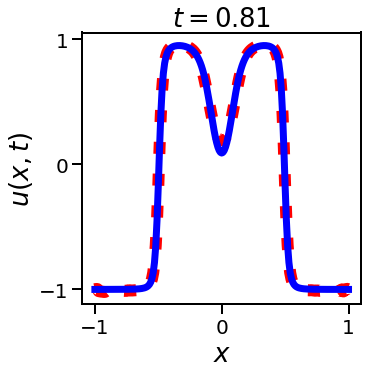

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# Make sure the font is Times Roman
plt.rcParams['font.family'] = 'Times New Roman'



final_time_output = prediction_tensor[-20, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-20, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.81}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.81_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


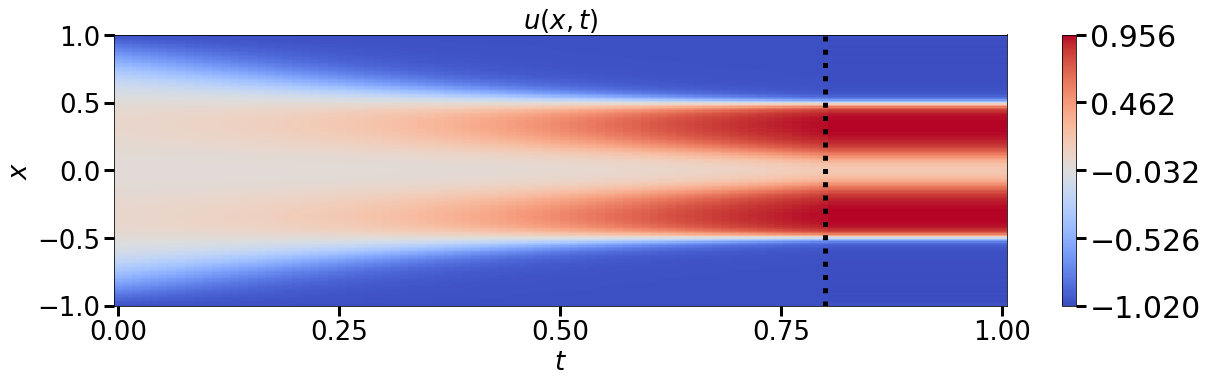

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_RNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
